### 10) Generate figures with results
Gordillo, da Cruz, Moreno, Garobbio, Herzog, 2022

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from dependencies.statsfigures import cm2inch, figures_subplot, figures_plot, get_concat_h, get_concat_v 
from dependencies.statsfigures import figure_1_ax_0, figure_1_ax_1,load_sp_dc_data
from dependencies.statsfigures import figure_2_3_ax_0, figure_2_3_ax_1
from dependencies.statsfigures import fig_4_load_data, figure_4_l, figure_4_b
from dependencies.statsfigures import figure_5, figure_6
from dependencies.statsfigures import figure_s2, figure_s3_4, figure_pc_s, figure_s11

In [2]:
main_dir = os.getcwd()
np.random.seed(234)

In [3]:
# Results directories
data_dir = os.path.join(main_dir,'data')
results_dir = os.path.join(main_dir,'results')
results_1_dir = os.path.join(results_dir, '1_correlations_eeg_beh_results')
results_2_dir = os.path.join(results_dir, '2_regression_results')
results_3_dir = os.path.join(results_dir, '3_group_comparison_results')
results_4_dir = os.path.join(results_dir, '4_correlations_groups_results')
results_5_dir = os.path.join(results_dir, '5_distancecorrelation_results')
results_6_dir = os.path.join(results_dir, '6_correlations_references_results')
results_7_dir = os.path.join(results_dir, '7_icc_references_results')
results_8_dir = os.path.join(results_dir, '8_pca_results')
summary_results_dir = os.path.join(results_dir, 'summary_results')
figures_results_dir = os.path.join(results_dir, 'figures_results')

# Cognitive task
beh_vars = ["Cvlt_attention_span", "Cvlt_delayed_memory", "Pts-2_subtest_3",
            "Rwt_animal_categories", "Rwt_s_words", "Tap_alertness",
            "Tap_simon_congruent", "Tap_simon_incongruent", "Tap_working_memory",
            "Tmt-A", "Tmt-B", "Vocabulary_test"]


0


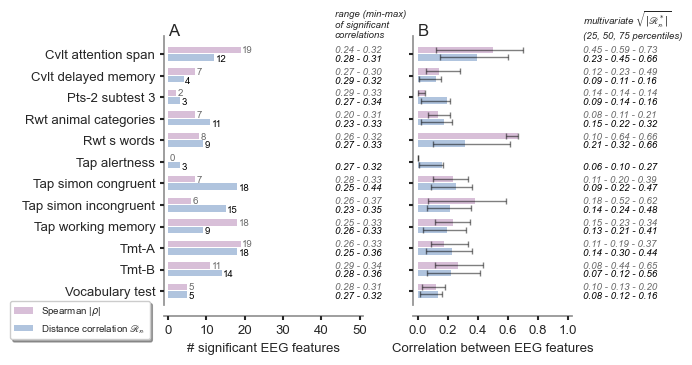

In [4]:
# Figure 1

sp_y_1 = pd.read_csv(os.path.join(summary_results_dir, '1_summary_spearman_y.csv'), index_col=0)
dc_y_1 = pd.read_csv(os.path.join(summary_results_dir, '1_summary_distcorr_y.csv'), index_col=0)
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=0.8)
ax = figure_1_ax_0(ax, sp_y_1, dc_y_1, font_text=7, color_sp='thistle', color_dc='lightsteelblue')
ax = figure_1_ax_1(ax, sp_y_1, dc_y_1, font_text=7, color_sp='thistle', color_dc='lightsteelblue')

plt.tight_layout()
plt.savefig(os.path.join(figures_results_dir, 'Figure_1.jpg'), dpi=300)

Tap_working_memory  y


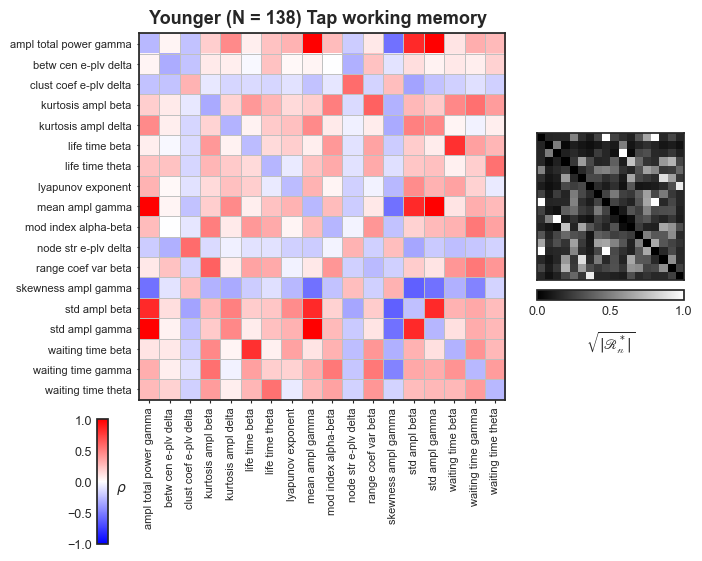

In [5]:
# Figure 2

idgroup = 'y'
sp_data = 'spearman_' + idgroup
task = beh_vars[8]

print(task + '  ' + idgroup)
fig, ax = figures_subplot(font_size=8, width=18, height=18, ratio_2=0.4)
data_results, results_multivardc = load_sp_dc_data(idgroup, sp_data, task, results_1_dir, results_5_dir)
fig, ax = figure_2_3_ax_0(fig, ax, data_results, title='Younger (N = 138) Tap working memory', method='spearman')
fig, ax = figure_2_3_ax_1(fig, ax, results_multivardc)
plt.savefig(os.path.join(figures_results_dir, 'Figure_2.jpg'), dpi=300)

# Crop a small part of the figure
img = Image.open(os.path.join(figures_results_dir, 'Figure_2.jpg'))
width, height = img.size
cut = height/8
cropped = img.crop((0, cut, width, height))
cropped.save(os.path.join(figures_results_dir, 'Figure_2.jpg'))

Tmt-A  y


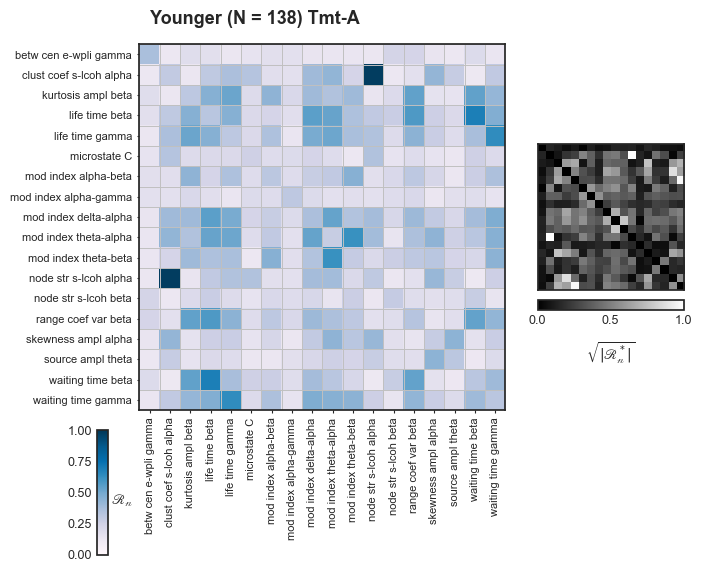

In [6]:
# Figure 3

idgroup = 'y'
dc_data = 'distcorr_' + idgroup
task = beh_vars[9]

print(task + '  ' + idgroup)
fig, ax = figures_subplot(font_size=8, width=18, height=18, ratio_2=0.4)
data_results, results_multivardc = load_sp_dc_data(idgroup, dc_data, task, results_1_dir, results_5_dir)
fig, ax = figure_2_3_ax_0(fig, ax, data_results, title='Younger (N = 138) Tmt-A', method='distcorr')
fig, ax = figure_2_3_ax_1(fig, ax, results_multivardc)
plt.savefig(os.path.join(figures_results_dir, 'Figure_3.jpg'), dpi=300)

# Crop a small part of the figure
img = Image.open(os.path.join(figures_results_dir, 'Figure_3.jpg'))
width, height = img.size
cut = height/8
cropped = img.crop((0, cut, width, height))
cropped.save(os.path.join(figures_results_dir, 'Figure_3.jpg'))

C:\Users\dario\AppData\Local\Temp\ipykernel_17860\4146849001.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\dario\AppData\Local\Temp\ipykernel_17860\4146849001.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


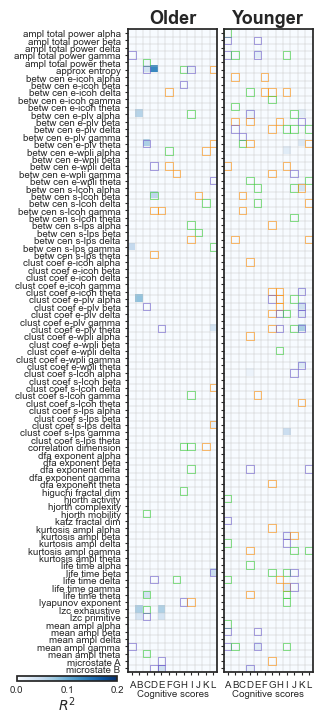

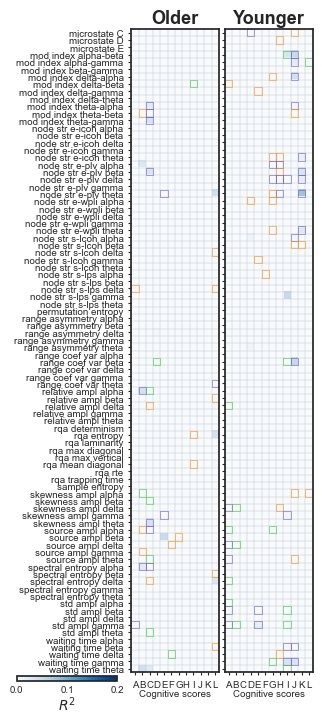

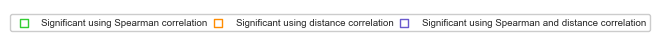

In [7]:
# Figure 4

Y_r2, Y_mask, O_r2, O_mask = fig_4_load_data(results_1_dir, results_2_dir, method='ridge')

# Figure 4 Left
fig_1, ax_1 = figures_subplot(font_size=7, width=8.5, height=18, ratio_2=1)
fig_1, ax_1 = figure_4_l(fig_1, ax_1, O_r2, O_mask, Y_r2, Y_mask, upper_r2=0.2, side='left', colormap='Blues', group='Older') 
fig_1, ax_1 = figure_4_l(fig_1, ax_1, O_r2, O_mask, Y_r2, Y_mask, upper_r2=0.2, side='left', colormap='Blues', group='Younger') 
plt.tight_layout()

plt.savefig(os.path.join(figures_results_dir, 'Figure_4_r2_1.jpg'), dpi=300)

# Figure 4 Right
fig_2, ax_2 = figures_subplot(font_size=7, width=8.5, height=18, ratio_2=1)
fig_2, ax_2 = figure_4_l(fig_2, ax_2, O_r2, O_mask, Y_r2, Y_mask, upper_r2=0.2, side='right', colormap='Blues', group='Older') 
fig_2, ax_2 = figure_4_l(fig_2, ax_2, O_r2, O_mask, Y_r2, Y_mask, upper_r2=0.2, side='right', colormap='Blues', group='Younger') 
plt.tight_layout()

plt.savefig(os.path.join(figures_results_dir,'Figure_4_r2_2.jpg'), dpi=300) 

# Figure 4 Bottom
fig_3, ax_3 = figures_plot(font_size=7, width=17, height=1)
fig_3, ax_3 = figure_4_b(fig_3, ax_3)
plt.tight_layout()

plt.savefig(os.path.join(figures_results_dir, 'Figure_4_r2_3.jpg'), dpi=300) 

# Merge figures
# Opening up of images
img = Image.open(os.path.join(figures_results_dir, 'Figure_4_r2_1.jpg'))
img1 = Image.open(os.path.join(figures_results_dir, 'Figure_4_r2_2.jpg'))
img2 = Image.open(os.path.join(figures_results_dir, 'Figure_4_r2_3.jpg'))

# Concatenate horizontally
c_img = get_concat_h(img, img1)

# Concatenate figures
get_concat_v(c_img, img2, crop_=40).save(os.path.join(figures_results_dir, 'Figure_4_full.jpg'))

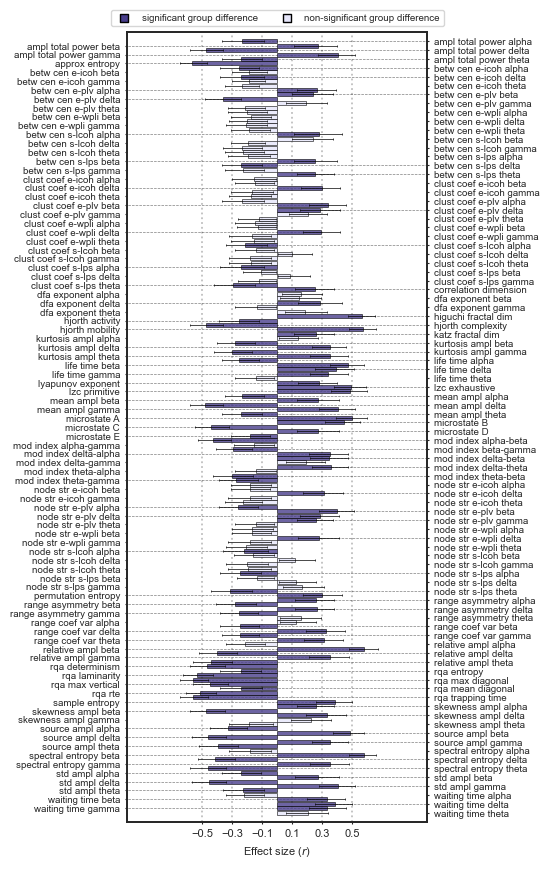

In [8]:
# Figure 5
# Biggest effect size 
fig, ax = figure_5(14, 22, results_3_dir)
plt.savefig(os.path.join(figures_results_dir, 'Figure_5.jpg'), dpi=300) 

C:\Users\dario\Dropbox\resting_state_stats\dependencies\statsfigures.py:521: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


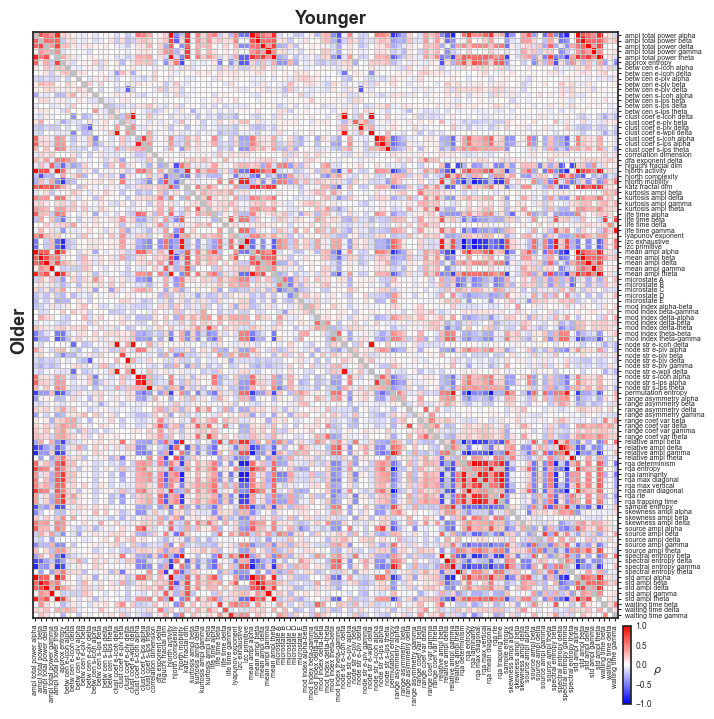

In [4]:
# Figure 6
fix, ax = figure_6(results_4_dir, size=18)
plt.savefig(os.path.join(figures_results_dir, 'Figure_6.jpg'), dpi=300) 

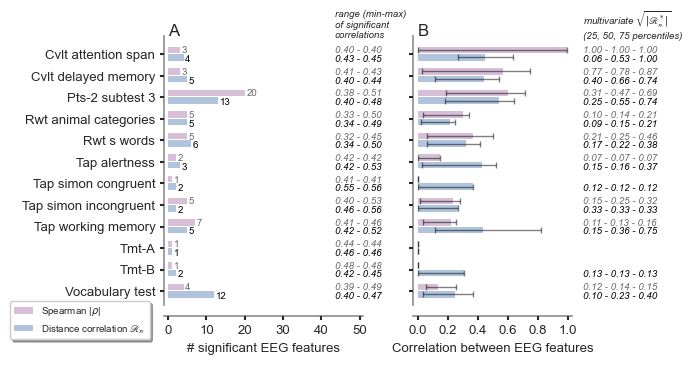

In [5]:
# Figure S1

sp_y_1 = pd.read_csv(os.path.join(summary_results_dir, '1_summary_spearman_o.csv'), index_col=0)
dc_y_1 = pd.read_csv(os.path.join(summary_results_dir, '1_summary_distcorr_o.csv'), index_col=0)
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=0.8)
ax = figure_1_ax_0(ax, sp_y_1, dc_y_1, font_text=7, color_sp='thistle', color_dc='lightsteelblue')
ax = figure_1_ax_1(ax, sp_y_1, dc_y_1, font_text=7, color_sp='thistle', color_dc='lightsteelblue')

plt.tight_layout()
plt.savefig(os.path.join(figures_results_dir, 'Figure_s1.jpg'), dpi=300)

C:\Users\dario\Dropbox\resting_state_stats\dependencies\statsfigures.py:582: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


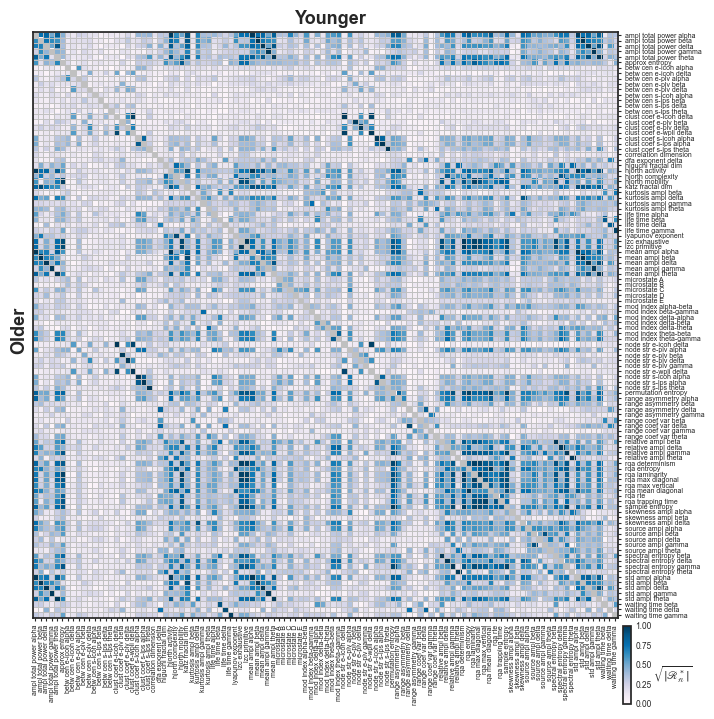

In [4]:
# Figure S2
fix, ax = figure_s2(results_4_dir,results_5_dir, size=18)
plt.savefig(os.path.join(figures_results_dir, 'Figure_s2.jpg'), dpi=300) 

C:\Users\dario\Dropbox\resting_state_stats\dependencies\statsfigures.py:640: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


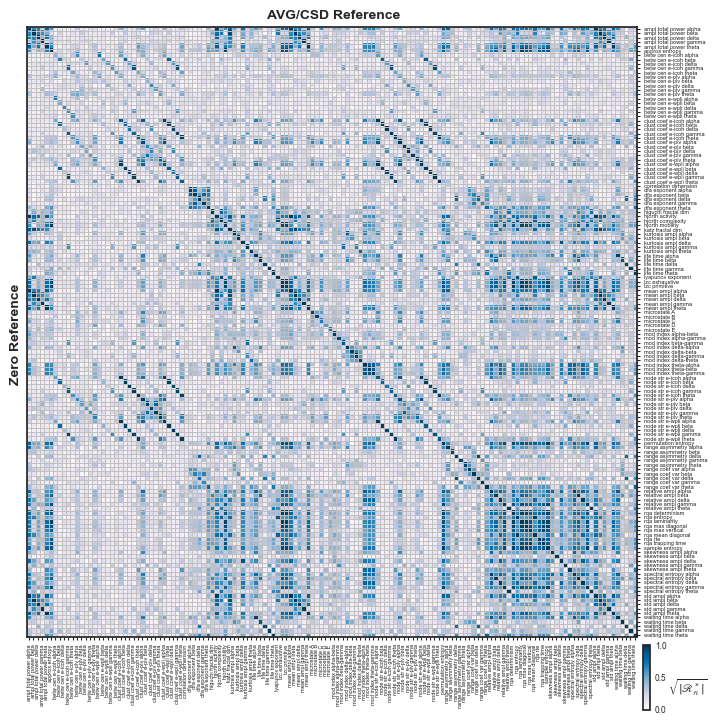

In [6]:
# Figure S3 and S4
group = 'y'
fix, ax = figure_s3_4(results_5_dir, results_6_dir, size=18, group=group)
if group=='y':
    plt.savefig(os.path.join(figures_results_dir, 'Figure_s3.jpg'), dpi=300) 
else:
    plt.savefig(os.path.join(figures_results_dir, 'Figure_s4.jpg'), dpi=300) 

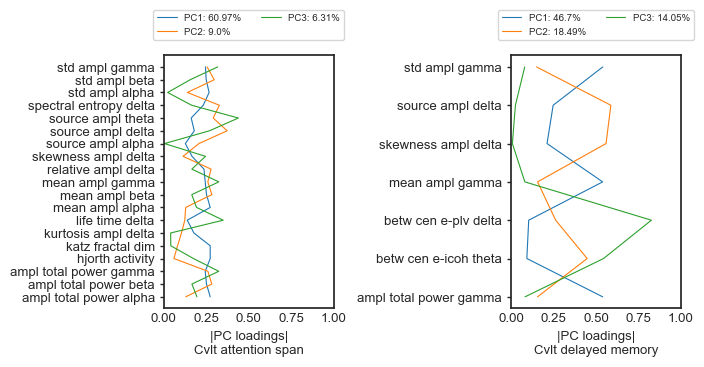

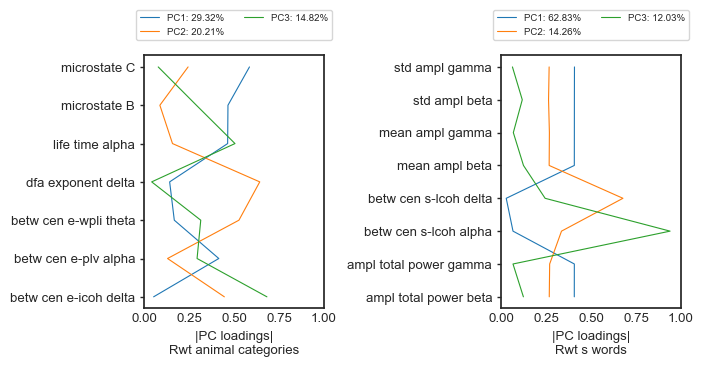

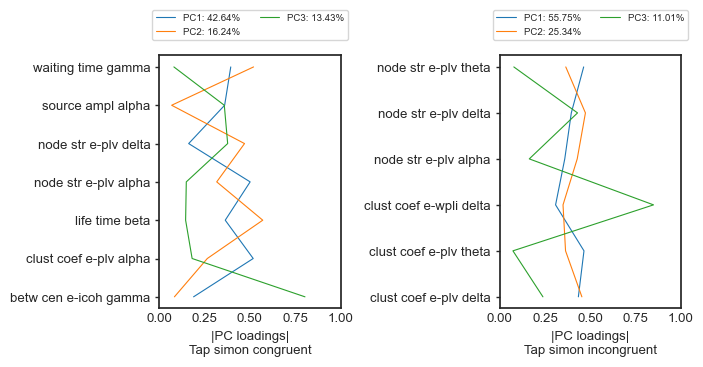

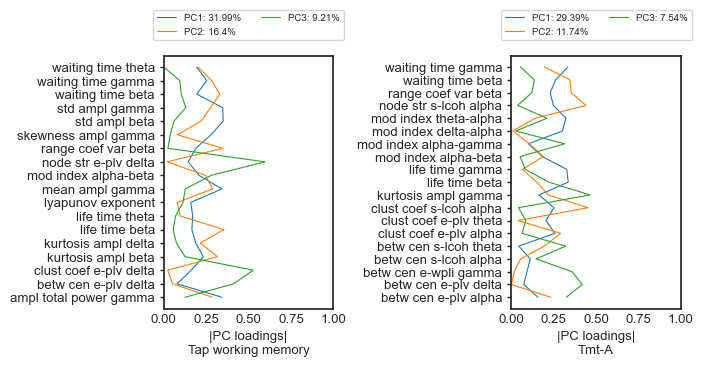

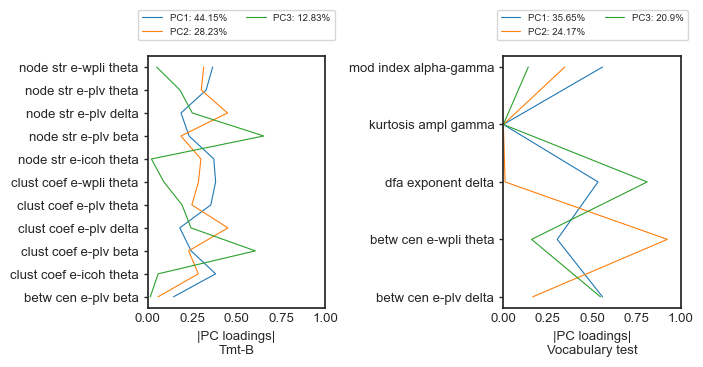

In [10]:
# Figures of principal component analysis for tasks showing significant Spearman 
# correlation with EEG features, for young adults
group = 'y'
# Figure S5 - 1
tasks = ['Cvlt_attention_span', 'Cvlt_delayed_memory']
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=1)
ax = figure_pc_s(ax, tasks, results_8_dir, method='sp', group='y')
plt.savefig(os.path.join(figures_results_dir, 'Figure_s5_1.jpg'), dpi=300)

# Figure S5 - 2
tasks = ['Rwt_animal_categories', 'Rwt_s_words']
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=1)
ax = figure_pc_s(ax, tasks, results_8_dir, method='sp', group='y')
plt.savefig(os.path.join(figures_results_dir, 'Figure_s5_2.jpg'), dpi=300)

# Merge into Fig S5
# Opening up of images
img = Image.open(os.path.join(figures_results_dir, 'Figure_s5_1.jpg'))
img1 = Image.open(os.path.join(figures_results_dir, 'Figure_s5_2.jpg'))
# Concatenate vertically
c_img = get_concat_v(img, img1).save(os.path.join(figures_results_dir, 'Figure_S5.jpg'))


# Figure S6 - 1
tasks = ['Tap_simon_congruent', 'Tap_simon_incongruent']
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=1)
ax = figure_pc_s(ax, tasks, results_8_dir, method='sp', group='y')
plt.savefig(os.path.join(figures_results_dir, 'Figure_s6_1.jpg'), dpi=300)

# Figure S6 - 2
tasks = ['Tap_working_memory', 'Tmt-A']
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=1)
ax = figure_pc_s(ax, tasks, results_8_dir, method='sp', group='y')
plt.savefig(os.path.join(figures_results_dir, 'Figure_s6_2.jpg'), dpi=300)

# Opening up of images
img = Image.open(os.path.join(figures_results_dir, 'Figure_s6_1.jpg'))
img1 = Image.open(os.path.join(figures_results_dir, 'Figure_s6_2.jpg'))
# Concatenate vertically
c_img = get_concat_v(img, img1).save(os.path.join(figures_results_dir, 'Figure_S6.jpg'))

# Figure S7
tasks = ['Tmt-B', 'Vocabulary_test']
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=1)
ax = figure_pc_s(ax, tasks, results_8_dir, method='sp', group='y')
plt.savefig(os.path.join(figures_results_dir, 'Figure_S7.jpg'), dpi=300)

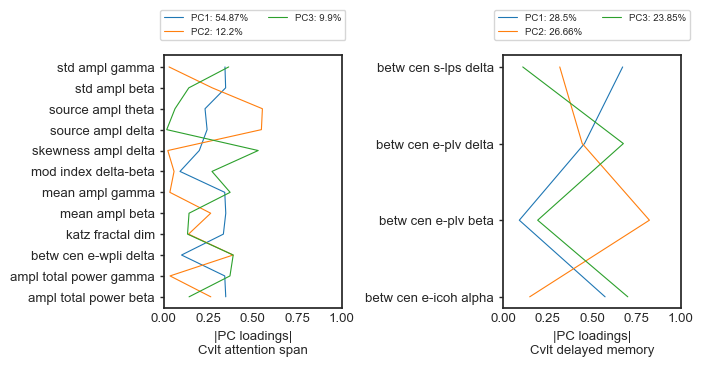

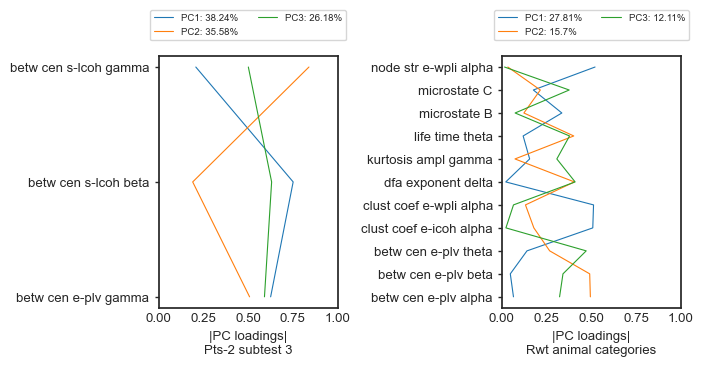

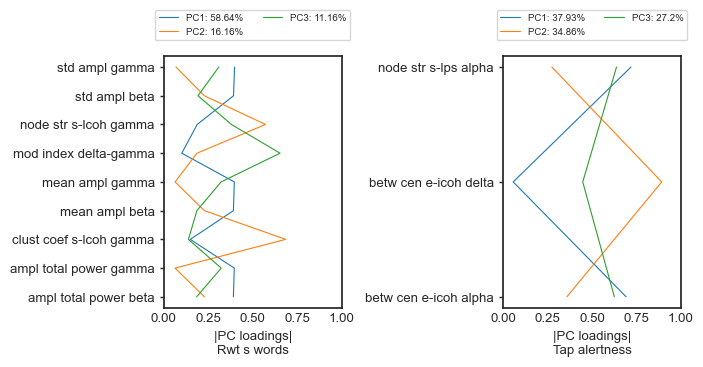

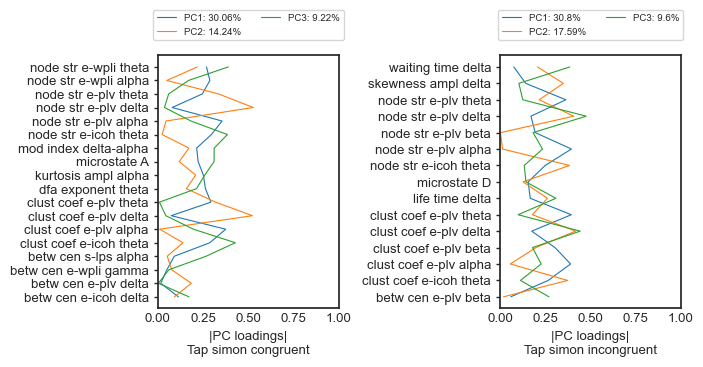

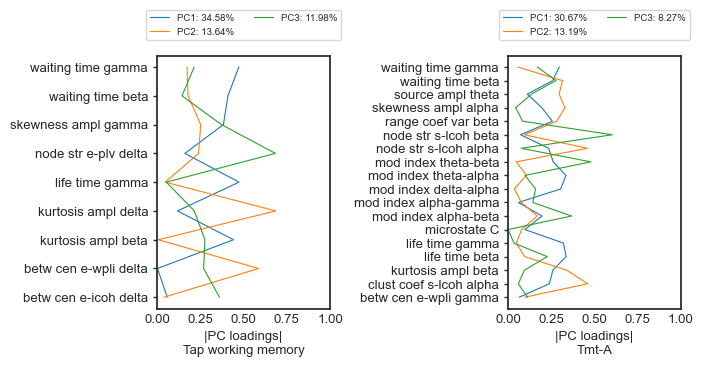

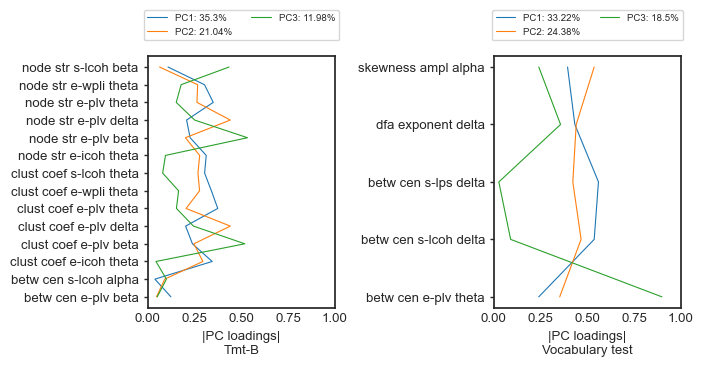

In [11]:
# Figures of principal component analysis for tasks showing significant distance correlaion with EEG features, for young adults

# Figure S8 - 1
tasks = ['Cvlt_attention_span', 'Cvlt_delayed_memory']
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=1)
ax = figure_pc_s(ax, tasks, results_8_dir, method='dc', group='y')
plt.savefig(os.path.join(figures_results_dir, 'Figure_s8_1.jpg'), dpi=300)

# Figure S8 - 2
tasks = ['Pts-2_subtest_3', 'Rwt_animal_categories']
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=1)
ax = figure_pc_s(ax, tasks, results_8_dir, method='dc', group='y')
plt.savefig(os.path.join(figures_results_dir, 'Figure_s8_2.jpg'), dpi=300)

# Merge into Fig S8
# Opening up of images
img = Image.open(os.path.join(figures_results_dir, 'Figure_s8_1.jpg'))
img1 = Image.open(os.path.join(figures_results_dir, 'Figure_s8_2.jpg'))
# Concatenate vertically
c_img = get_concat_v(img, img1).save(os.path.join(figures_results_dir, 'Figure_S8.jpg'))


# Figure S9 - 1
tasks = ['Rwt_s_words', 'Tap_alertness']
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=1)
ax = figure_pc_s(ax, tasks, results_8_dir, method='dc', group='y')
plt.savefig(os.path.join(figures_results_dir, 'Figure_s9_1.jpg'), dpi=300)

# Figure S9 - 2
tasks = ['Tap_simon_congruent', 'Tap_simon_incongruent']
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=1)
ax = figure_pc_s(ax, tasks, results_8_dir, method='dc', group='y')
plt.savefig(os.path.join(figures_results_dir, 'Figure_s9_2.jpg'), dpi=300)

# Opening up of images
img = Image.open(os.path.join(figures_results_dir, 'Figure_s9_1.jpg'))
img1 = Image.open(os.path.join(figures_results_dir, 'Figure_s9_2.jpg'))
# Concatenate vertically
c_img = get_concat_v(img, img1).save(os.path.join(figures_results_dir, 'Figure_S9.jpg'))

# Figure S10 - 1
tasks = ['Tap_working_memory', 'Tmt-A']
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=1)
ax = figure_pc_s(ax, tasks, results_8_dir, method='dc', group='y')
plt.savefig(os.path.join(figures_results_dir, 'Figure_s10_1.jpg'), dpi=300)

# Figure S10 - 2
tasks = ['Tmt-B', 'Vocabulary_test']
fig, ax = figures_subplot(font_size=9.5, width=18, height=9.5, ratio_2=1)
ax = figure_pc_s(ax, tasks, results_8_dir, method='dc', group='y')
plt.savefig(os.path.join(figures_results_dir, 'Figure_s10_2.jpg'), dpi=300)

# Opening up of images
img = Image.open(os.path.join(figures_results_dir, 'Figure_s10_1.jpg'))
img1 = Image.open(os.path.join(figures_results_dir, 'Figure_s10_2.jpg'))
# Concatenate vertically
c_img = get_concat_v(img, img1).save(os.path.join(figures_results_dir, 'Figure_S10.jpg'))

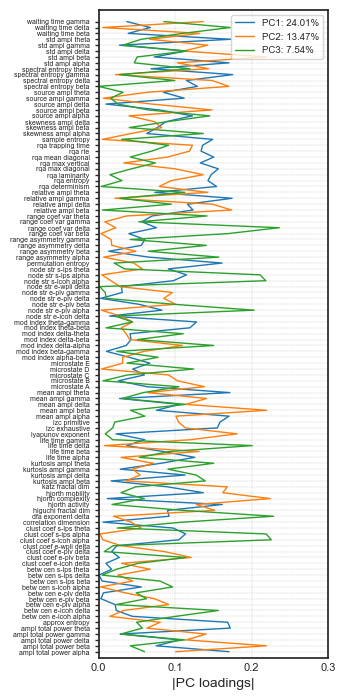

In [12]:
# Figure S11
fig, ax = figure_s11(9, 18, results_8_dir, group='o')
plt.savefig(os.path.join(figures_results_dir, 'Figure_s11.jpg'), dpi=300) 